In [1]:
from diffusers import StableDiffusionPipeline
from dotenv import load_dotenv
import os
from azure.storage.blob import BlobServiceClient

load_dotenv()

True

In [2]:
pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to("cuda")


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

c:\Users\lucasmeyer\personal\blog\.venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [3]:
style = """illustration, high detail, realistic shaded lighting by ilya kuvshinov and michael garmash and rob rey, 
iamag premiere, wlop matte print, 8k resolution, a masterpiece"""

# prompt1 = "blue Twitter bird on fence"

# prompt2 = "standard schnauzer dog, running on spaceship, gray fur, wearing jedi hood, holding lightsaber in mouth"

# prompt3 = "disney librarian being hit by lightning, brown hair, grey eyes, cute face, wearing black turtleneck, behind desk"

# prompt4 = "schnauzer dog with yoda body, chasing a ball, in a spaceship"

# prompt5 = "schnauzer dog wizard, harry potter style, riding a broom, wearing glasses"

# prompt6 = "schnauzer police dog, wearing deerstalker hat, grey fur"

# prompt7 = "schnauzer dog as a pirate captain, on a pirate ship, grey fur"

# prompt8 = "schnauzer dog rapunzel, on a tower, grey fur"

# filename = "robot_cow.png"
# prompt9 = "cow and robot, on a farm"

# filename = "peltzman.png"
# prompt10 = "Disney socialite, cute face, wearing turtleneck, brown hair, grey eyes, driving a car not wearing a seatbelt"

# filename = "professor.png"
# prompt11 = "Disney young female professor, typing an academic paper, cute fine face, wearing turtleneck, brown hair, grey eyes"

# filename = "tree_network.png"
prompt12 = "A computer network of trees in a forest"

In [4]:
negative_prompt1 = "ugly, low detail, extra limbs, malformed limbs, poorly drawn hands"

In [5]:
prompt = "Disney socialite professor teaching a class, writing on a whiteboard, wearing glasses and a turtleneck"

In [6]:
prompt = f"{prompt}, {style}"
negative_prompt = negative_prompt1

In [7]:
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, height=512, width=512, num_inference_steps=72, guidance_scale=6.5).images[0]


  0%|          | 0/72 [00:00<?, ?it/s]

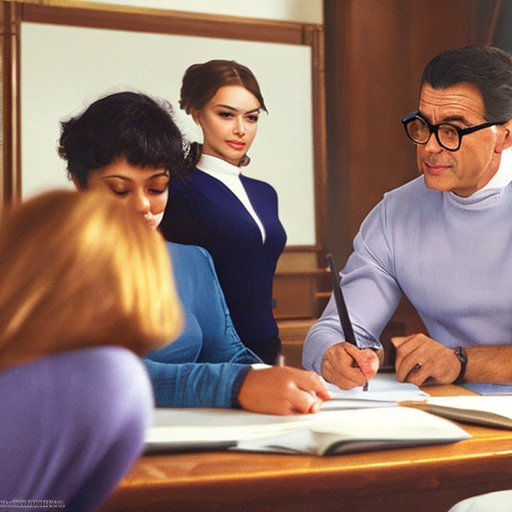

In [8]:
image

In [11]:

filename = "diffused_linear_algebra_prof.png"

In [12]:
image.save(f"/users/lucasmeyer/personal/blog/local_data/{filename}", overwrite=True)

In [13]:
# Replace with your connection string
connection_string = os.getenv("AZURE_STORAGE_CONN")

# Replace with your container name
container_name = "blog-images"

# Replace with your blob name
blob_name = f"diffused_{filename}"

# Replace with the path to your local file
local_file_path = f"/users/lucasmeyer/personal/blog/local_data/{filename}"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)

with open(local_file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)